In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests
from bs4 import BeautifulSoup
import seaborn as sns

# Web Scraping of Mobiles

In [30]:
product_name=[]
rating=[]
reviews=[]
price=[]
offer_discount=[]
Screen_size=[]
Camera=[]
Battery=[]
Ram=[]

for i in range(1,201):
    url= f'https://www.flipkart.com/search?q=smart+mobiles+5g&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_11_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_11_na_na_na&as-pos=1&as-type=RECENT&suggestionId=smart+mobiles+5g%7CMobiles&requestId=4274968f-50a1-4500-b752-f3a28e12b7d4&as-searchtext=smart+mobil&page={i}'
    page=requests.get(url)
    soup=BeautifulSoup(page.text)
    
    for i in soup.find_all("div",class_='KzDlHZ'): # Used again for titles data
        product_name.append(i.text)

    for i in soup.find_all("div",class_="tUxRFH"): # Used again for processor 
        text=i.text

        a = i.find("div",class_="XQDdHH") # Ratings
        if a:
            rating.append(a.text)
        else:
            rating.append(np.nan)

        b = i.find("span",class_="Wphh3N") # Reviews & Ratings
        if b:
            reviews.append(b.text.replace('\xa0', ' ').strip())
        else:
            reviews.append(np.nan)

        c = i.find("div",class_="Nx9bqj _4b5DiR") # Price
        if c:
            price.append(c.text)
        else:
            price.append(np.nan)

        d = i.find("div",class_="UkUFwK") # Offer
        if d:
            match = re.findall(r'\d+%', d.text)
            if match:
                offer_discount.append(match[0])
            else:
                offer_discount.append(d.text)
        else:
            offer_discount.append(np.nan)

        e = re.findall(r'\((\d+\.\d+)',text)
        if e:
            Screen_size.append(e[0])
        else:
            Screen_size.append(np.nan)

        f = re.findall(r'Display(.*)\sFront',text)
        if f:
            Camera.append(f[0])
        else:
            Camera.append(np.nan)
    
    
        g = re.findall(r'(\d+)\smAh\sBattery',text)
        if g:
            Battery.append(g[0])
        else:
            Battery.append(np.nan)

        h = re.findall(r'(\d+)\sGB\sRAM',text)
        if h:
            Ram.append(h[0])
        else:
            Ram.append(np.nan)

In [32]:
import re
model_names = []
brand=[]
storage=[]

for title in product_name:
    # Extract everything before the first hyphen
    match = re.findall(r'^(.*?)(?=\s*(?:with|\(|,|\|))', title) # Model Name
    if match:
        model_names.append(match[0].strip())
    else:
        model_names.append(title.split('(')[0].strip())
        
for matter in product_name:
    match_2 = re.findall(r'^(\w+)\s*', matter) # Brand
    if match_2:
        brand.append(match_2[0].strip())
    else:
        brand.append(np.nan)

for matter in product_name: # Storage
    match_2 = re.findall(r'(\d+\s?GB)\)', matter)
    if match_2:
        storage.append(match_2[0].strip())
    else:
        storage.append(np.nan)

In [388]:
data={"Product Name":model_names,"Brand":brand,"Ram":Ram,"Storage":storage,"Camera":Camera,"Screen_size":Screen_size,"Battery":Battery,"Rating":rating,"Review and Rating":reviews,"Offer":offer_discount,"Price":price}

In [390]:
mobiles_data=pd.DataFrame(data)

In [392]:
mobiles_data

,Product Name,Brand,Ram,Storage,Camera,Screen_size,Battery,Rating,Review and Rating,Offer,Price
0,POCO C75 5G,POCO,4,64 GB,50MP Rear Camera | 5MP,6.88,5160,4.3,"70,650 Ratings & 3,673 Reviews",30%,"₹7,699"
1,POCO C75 5G,POCO,4,64 GB,50MP Rear Camera | 5MP,6.88,5160,4.3,"70,650 Ratings & 3,673 Reviews",30%,"₹7,699"
2,OPPO K13x 5G 6000mAh and 45W SUPERVOOC Charger...,OPPO,6,128 GB,50MP + 2MP | 8MP,6.67,6000,4.7,823 Ratings & 25 Reviews,23%,"₹12,999"
3,POCO C75 5G,POCO,4,128 GB,50MP Rear Camera | 5MP,6.88,5160,4.3,"70,650 Ratings & 3,673 Reviews",26%,"₹8,499"
4,POCO C75 5G,POCO,4,64 GB,50MP Rear Camera | 5MP,6.88,5160,4.3,"70,650 Ratings & 3,673 Reviews",30%,"₹7,699"
...,...,...,...,...,...,...,...,...,...,...,...
931,POCO M7 5G - Locked,POCO,6,128 GB,50MP Rear Camera | 8MP,6.88,5160,4.1,"20,876 Ratings & 1,180 Reviews",32%,"₹8,799"
932,vivo Y29 5G,vivo,4,128 GB,50MP + 0.08MP | 8MP,6.68,5500,4.3,640 Ratings & 35 Reviews,15%,"₹13,999"
933,Apple iPhone 15 Plus,Apple,NaN,256 GB,48MP + 12MP | 12MP,6.7,NaN,4.6,"45,284 Ratings & 2,559 Reviews",5%,"₹84,900"
934,vivo Y29 5G,vivo,8,128 GB,50MP + 0.08MP | 8MP,6.68,5500,4.3,759 Ratings & 36 Reviews,22%,"₹16,999"


In [394]:
mobiles_data.isna().sum()

Product Name           0
Brand                 14
Ram                   44
Storage                2
Camera               157
Screen_size           14
Battery               91
Rating                16
Review and Rating     16
Offer                 38
Price                 12
dtype: int64

In [396]:
mobiles_data.dropna(inplace=True)
mobiles_data.reset_index(drop=True, inplace=True)

In [398]:
mobiles_data.isna().sum()

Product Name         0
Brand                0
Ram                  0
Storage              0
Camera               0
Screen_size          0
Battery              0
Rating               0
Review and Rating    0
Offer                0
Price                0
dtype: int64

In [400]:
mobiles_data

,Product Name,Brand,Ram,Storage,Camera,Screen_size,Battery,Rating,Review and Rating,Offer,Price
0,POCO C75 5G,POCO,4,64 GB,50MP Rear Camera | 5MP,6.88,5160,4.3,"70,650 Ratings & 3,673 Reviews",30%,"₹7,699"
1,POCO C75 5G,POCO,4,64 GB,50MP Rear Camera | 5MP,6.88,5160,4.3,"70,650 Ratings & 3,673 Reviews",30%,"₹7,699"
2,OPPO K13x 5G 6000mAh and 45W SUPERVOOC Charger...,OPPO,6,128 GB,50MP + 2MP | 8MP,6.67,6000,4.7,823 Ratings & 25 Reviews,23%,"₹12,999"
3,POCO C75 5G,POCO,4,128 GB,50MP Rear Camera | 5MP,6.88,5160,4.3,"70,650 Ratings & 3,673 Reviews",26%,"₹8,499"
4,POCO C75 5G,POCO,4,64 GB,50MP Rear Camera | 5MP,6.88,5160,4.3,"70,650 Ratings & 3,673 Reviews",30%,"₹7,699"
...,...,...,...,...,...,...,...,...,...,...,...
647,Samsung Galaxy A16 5G,Samsung,8,256 GB,50MP + 5MP + 2MP | 13MP,6.7,5000,4.2,"2,897 Ratings & 175 Reviews",13%,"₹21,294"
648,POCO M7 5G - Locked,POCO,6,128 GB,50MP Rear Camera | 8MP,6.88,5160,4.1,"20,876 Ratings & 1,180 Reviews",32%,"₹8,799"
649,vivo Y29 5G,vivo,4,128 GB,50MP + 0.08MP | 8MP,6.68,5500,4.3,640 Ratings & 35 Reviews,15%,"₹13,999"
650,vivo Y29 5G,vivo,8,128 GB,50MP + 0.08MP | 8MP,6.68,5500,4.3,759 Ratings & 36 Reviews,22%,"₹16,999"


In [402]:
mobiles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Product Name       652 non-null    object
 1   Brand              652 non-null    object
 2   Ram                652 non-null    object
 3   Storage            652 non-null    object
 4   Camera             652 non-null    object
 5   Screen_size        652 non-null    object
 6   Battery            652 non-null    object
 7   Rating             652 non-null    object
 8   Review and Rating  652 non-null    object
 9   Offer              652 non-null    object
 10  Price              652 non-null    object
dtypes: object(11)
memory usage: 56.2+ KB


# Data Cleaning

In [405]:
# Convert Price to integer
mobiles_data['Price'] = mobiles_data['Price'].str.replace('₹', '').str.replace(',', '').astype(int)

In [407]:
# Convert Ram to category
mobiles_data['Ram'] = mobiles_data['Ram'].astype('category')

In [409]:
# Convert Storage to category (in GB)
mobiles_data['Storage'] = mobiles_data['Storage'].str.replace('GB', '').astype('category')

In [411]:
# Convert Screen_size to float
mobiles_data['Screen_size'] = mobiles_data['Screen_size'].astype(float)

In [413]:
# Convert Battery to integer
mobiles_data['Battery'] = mobiles_data['Battery'].astype(int)

In [415]:
# Convert Rating to float
mobiles_data['Rating'] = mobiles_data['Rating'].astype(float)

In [417]:
# Convert Offer to integer (strip %)
mobiles_data['Offer'] = mobiles_data['Offer'].str.replace('%', '', regex=False).astype(int)

In [419]:
mobiles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Product Name       652 non-null    object  
 1   Brand              652 non-null    object  
 2   Ram                652 non-null    category
 3   Storage            652 non-null    category
 4   Camera             652 non-null    object  
 5   Screen_size        652 non-null    float64 
 6   Battery            652 non-null    int32   
 7   Rating             652 non-null    float64 
 8   Review and Rating  652 non-null    object  
 9   Offer              652 non-null    int32   
 10  Price              652 non-null    int32   
dtypes: category(2), float64(2), int32(3), object(4)
memory usage: 40.0+ KB


In [421]:
# Split Review and Rating into Two New Columns
# First, remove commas to make conversion to int easier
mobiles_data['Review and Rating'] = mobiles_data['Review and Rating'].str.replace(',', '')

# Now split the string and extract rating and review counts
mobiles_data['Rating_Count'] = mobiles_data['Review and Rating'].str.split(' Ratings').str[0]
mobiles_data['Review_Count'] = mobiles_data['Review and Rating'].str.split('Reviews').str[0].str.split('&').str[-1].str.strip()

# Convert to numeric
mobiles_data['Rating_Count'] = mobiles_data['Rating_Count'].astype(int)
mobiles_data['Review_Count'] = mobiles_data['Review_Count'].astype(int)

In [423]:
# Split Camera into Rear and Front
mobiles_data[['Rear_Camera', 'Front_Camera']] = mobiles_data['Camera'].str.split('|', expand=True)
mobiles_data['Rear_Camera'] = mobiles_data['Rear_Camera'].str.strip()
mobiles_data['Front_Camera'] = mobiles_data['Front_Camera'].str.strip()

In [425]:
# Strip Whitespaces from Brand & Product
mobiles_data['Brand'] = mobiles_data['Brand'].str.strip()
mobiles_data['Product Name'] = mobiles_data['Product Name'].str.strip()

# Data Manipulation

In [428]:
# Add Total_Engagements (Reviews + Ratings)
mobiles_data['Total_Engagements'] = mobiles_data['Rating_Count'] + mobiles_data['Review_Count']

In [430]:
# Create Price Range Buckets
def get_price_range(price):
    if price <= 10000:
        return '<10K'
    elif price <= 15000:
        return '10K-15K'
    elif price <= 20000:
        return '15K-20K'
    elif price <= 25000:
        return '20K-25K'
    elif price <= 30000:
        return '25K-30K'
    else:
        return '30K+'

# Apply the function to the Price column
mobiles_data['Price_Range'] = mobiles_data['Price'].apply(get_price_range)

In [432]:
# Rating Category
def get_rating_category(rating):
    if rating <= 3:
        return 'Poor'
    elif rating <= 3.5:
        return 'Average'
    elif rating <= 4:
        return 'Good'
    elif rating <= 4.5:
        return 'Very Good'
    else:
        return 'Excellent'

# Apply the function to the Rating column
mobiles_data['Rating_Category'] = mobiles_data['Rating'].apply(get_rating_category)

In [434]:
# Sort by Price or Rating (Optional)
mobiles_data.sort_values(by='Price', ascending=True, inplace=True)
mobiles_data.reset_index(drop=True, inplace=True)

In [436]:
mobiles_data = mobiles_data[[
    'Product Name', 'Brand', 'Ram', 'Storage', 'Battery', 'Screen_size',
    'Rear_Camera', 'Front_Camera', 'Rating', 'Rating_Category',
    'Rating_Count', 'Review_Count', 'Total_Engagements',
    'Offer', 'Price', 'Price_Range'
]]

In [438]:
mobiles_data

,Product Name,Brand,Ram,Storage,Battery,Screen_size,Rear_Camera,Front_Camera,Rating,Rating_Category,Rating_Count,Review_Count,Total_Engagements,Offer,Price,Price_Range
0,MOTOROLA G04,MOTOROLA,4,64,5000,6.60,16MP Rear Camera,5MP,4.2,Very Good,16753,1042,17795,30,6999,<10K
1,Motorola g04s,Motorola,4,64,5000,6.60,50MP Rear Camera,5MP,4.2,Very Good,29634,1640,31274,27,7299,<10K
2,Motorola g04s,Motorola,4,64,5000,6.60,50MP Rear Camera,5MP,4.2,Very Good,29634,1640,31274,27,7299,<10K
3,Motorola g04s,Motorola,4,64,5000,6.60,50MP Rear Camera,5MP,4.2,Very Good,29634,1640,31274,27,7299,<10K
4,POCO C61 - Locked,POCO,4,64,5000,6.71,8MP Rear Camera,5MP,4.1,Very Good,107774,4604,112378,16,7499,<10K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,Samsung Galaxy S24 Ultra 5G,Samsung,12,256,5000,6.80,200MP + 50MP + 12MP + 10MP,12MP,4.6,Excellent,3142,314,3456,38,82979,30K+
648,Samsung Galaxy S24 Ultra 5G,Samsung,12,256,5000,6.80,200MP + 50MP + 12MP + 10MP,12MP,4.6,Excellent,3142,314,3456,38,82988,30K+
649,Google Pixel 9 Pro,Google,16,256,4700,6.30,50MP + 48MP + 48MP,42MP,4.6,Excellent,479,61,540,18,89999,30K+
650,vivo X200 Pro 5G,vivo,16,512,6000,6.78,50MP + 50MP + 200MP,32MP,4.7,Excellent,865,200,1065,6,94999,30K+


In [440]:
mobiles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Product Name       652 non-null    object  
 1   Brand              652 non-null    object  
 2   Ram                652 non-null    category
 3   Storage            652 non-null    category
 4   Battery            652 non-null    int32   
 5   Screen_size        652 non-null    float64 
 6   Rear_Camera        652 non-null    object  
 7   Front_Camera       652 non-null    object  
 8   Rating             652 non-null    float64 
 9   Rating_Category    652 non-null    object  
 10  Rating_Count       652 non-null    int32   
 11  Review_Count       652 non-null    int32   
 12  Total_Engagements  652 non-null    int32   
 13  Offer              652 non-null    int32   
 14  Price              652 non-null    int32   
 15  Price_Range        652 non-null    object  
dtypes: categ

In [444]:
mobiles_data.to_csv('Mobiles_by_me.csv')

<div style="height:2px; background-color:orange; margin-top:10px; margin-bottom:10px;"></div>

# Univariate Analysis

### **1.Brand Distribution**

C:\Users\gowth\AppData\Local\Temp\ipykernel_17256\1617589362.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Brand', data=mobiles_data, order=mobiles_data['Brand'].value_counts().index, palette='muted')


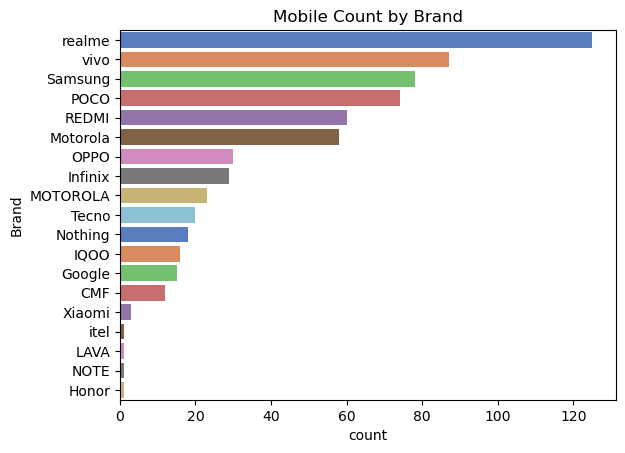

In [93]:
sns.countplot(y='Brand', data=mobiles_data, order=mobiles_data['Brand'].value_counts().index, palette='muted')
plt.title('Mobile Count by Brand')
plt.show()

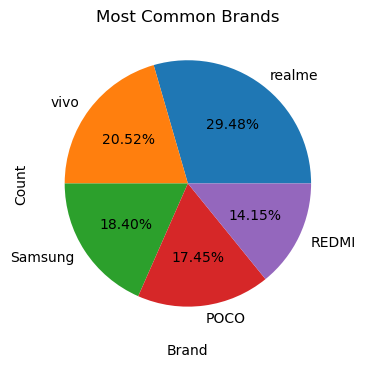

In [95]:
mobiles_data['Brand'].value_counts().head(5).plot(kind='pie', autopct='%0.2f%%',figsize=(10, 4), title='Most Common Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

### **2.How many mobiles fall in each price range?**

C:\Users\gowth\AppData\Local\Temp\ipykernel_17256\2311371017.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Price_Range', data=mobiles_data, palette='Accent')


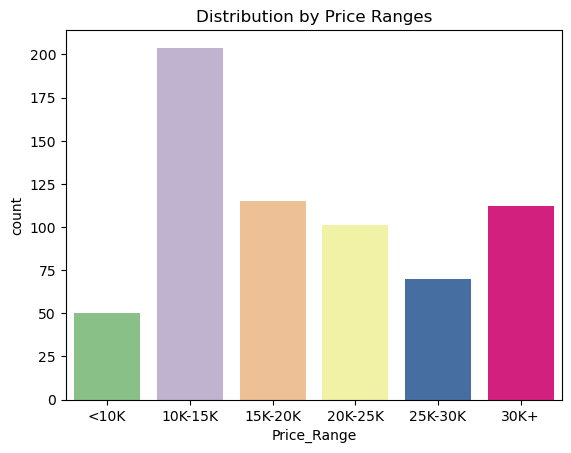

In [98]:
sns.countplot(x='Price_Range', data=mobiles_data, palette='Accent')
plt.title('Distribution by Price Ranges')
plt.show()

### **3.What is the distribution of RAM in mobiles?**

C:\Users\gowth\AppData\Local\Temp\ipykernel_17256\2596575416.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ram', data=mobiles_data, palette='Set3')


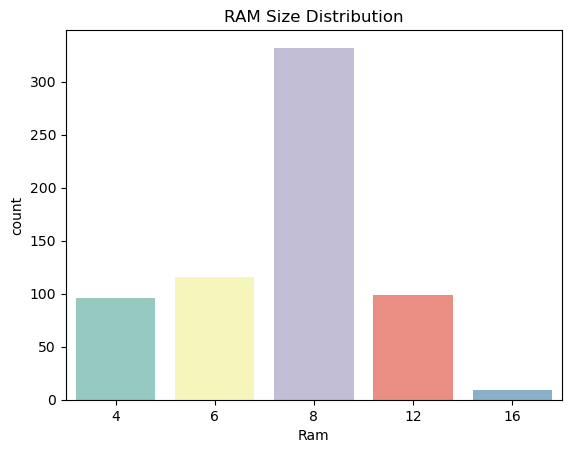

In [101]:
sns.countplot(x='Ram', data=mobiles_data, palette='Set3')
plt.title('RAM Size Distribution')
plt.show()

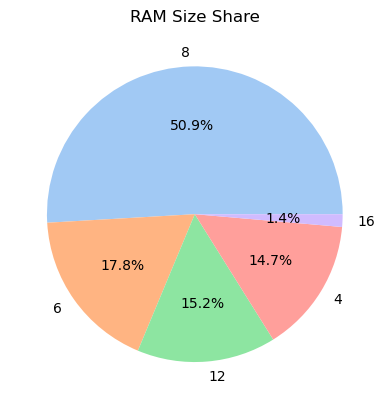

In [103]:
mobiles_data['Ram'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.ylabel('')
plt.title('RAM Size Share')
plt.show()

### **4.What are the most common storage sizes?**

C:\Users\gowth\AppData\Local\Temp\ipykernel_17256\2047990324.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Storage', data=mobiles_data, palette='Set2')


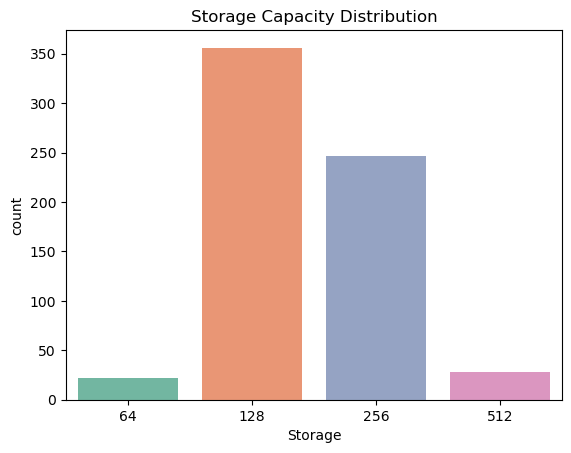

In [106]:
sns.countplot(x='Storage', data=mobiles_data, palette='Set2')
plt.title('Storage Capacity Distribution')
plt.show()

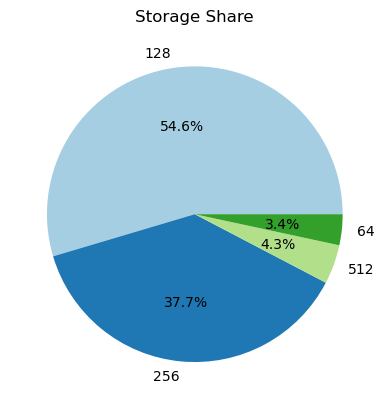

In [108]:
mobiles_data['Storage'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Paired'))
plt.ylabel('')
plt.title('Storage Share')
plt.show()

### **5.Battery Capacity Distribution**

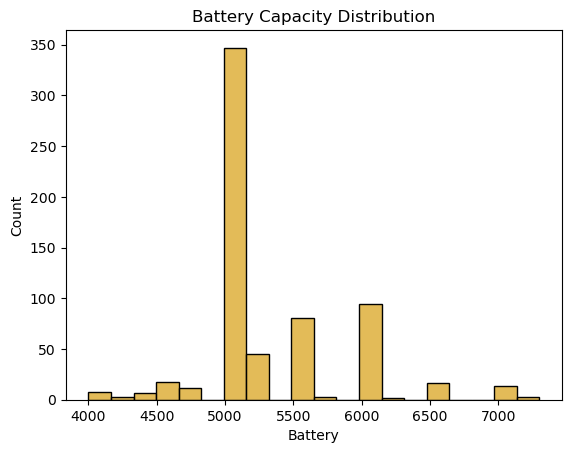

In [111]:
sns.histplot(mobiles_data['Battery'], bins=20, color='goldenrod')
plt.title('Battery Capacity Distribution')
plt.show()

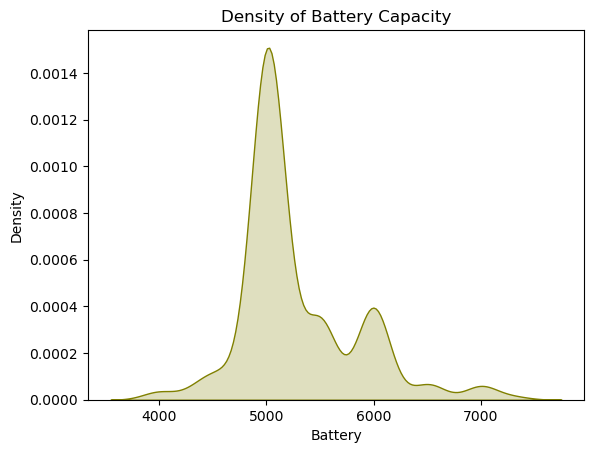

In [113]:
sns.kdeplot(mobiles_data['Battery'], fill=True, color='olive')
plt.title('Density of Battery Capacity')
plt.show()

### **6.Distribution of Prices**

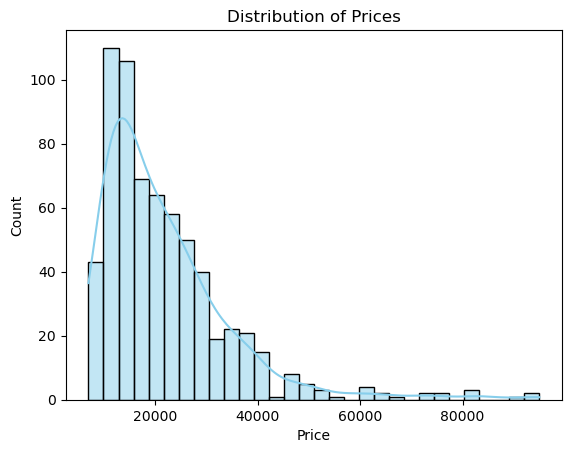

In [116]:
sns.histplot(mobiles_data['Price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

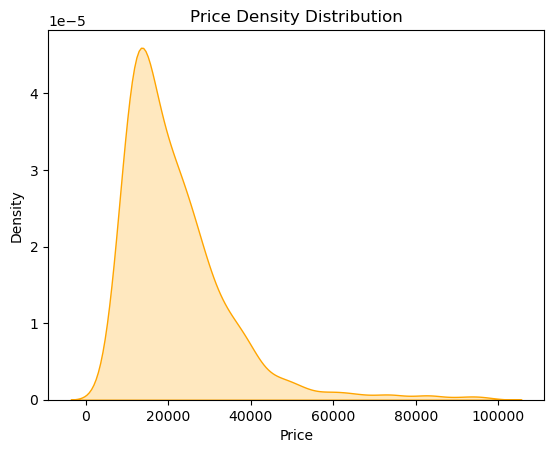

In [118]:
sns.kdeplot(mobiles_data['Price'], fill=True, color='orange')
plt.title('Price Density Distribution')
plt.show()

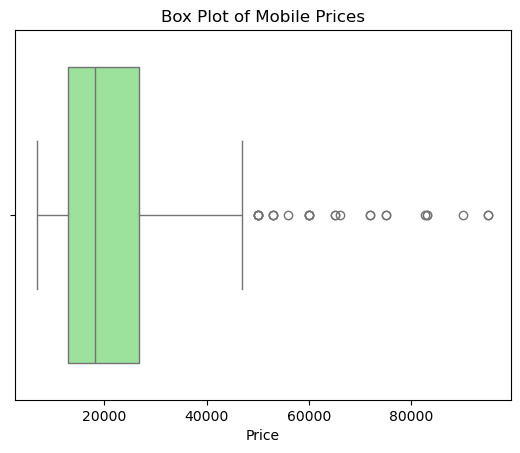

In [120]:
sns.boxplot(x=mobiles_data['Price'], color='lightgreen')
plt.title('Box Plot of Mobile Prices')
plt.show()

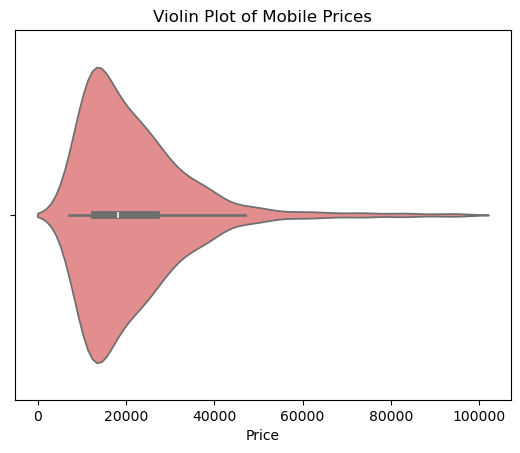

In [122]:
sns.violinplot(x=mobiles_data['Price'], color='lightcoral')
plt.title('Violin Plot of Mobile Prices')
plt.show()

### **7.Distribution of Ratings**

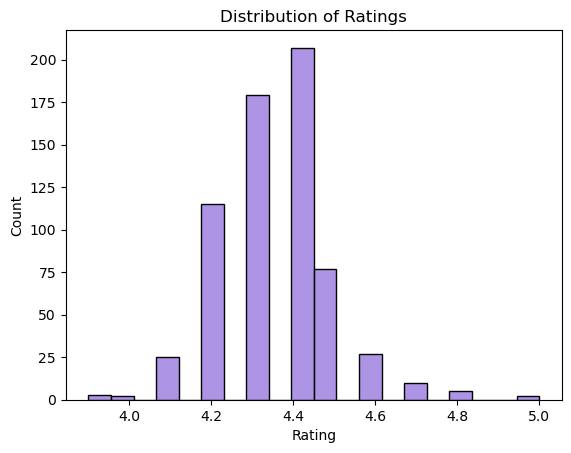

In [125]:
sns.histplot(mobiles_data['Rating'], bins=20, color='mediumpurple')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

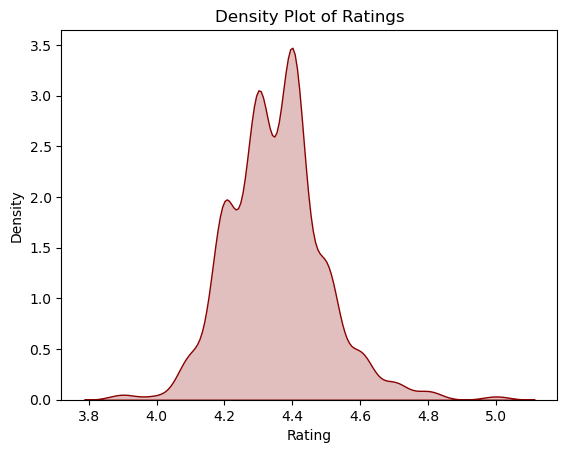

In [127]:
sns.kdeplot(mobiles_data['Rating'], fill=True, color='darkred')
plt.title('Density Plot of Ratings')
plt.show()

### **8.Offer % Distribution**

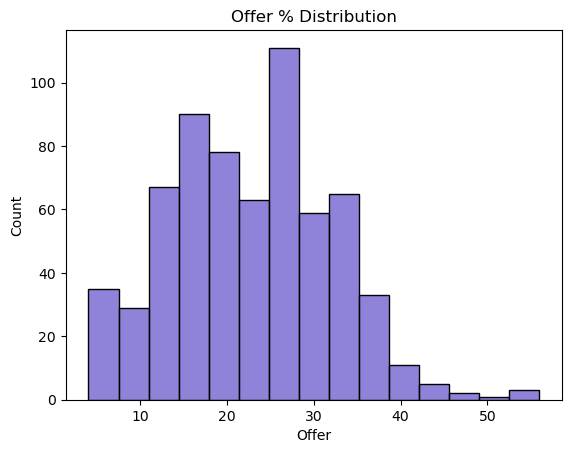

In [130]:
sns.histplot(mobiles_data['Offer'], bins=15, color='slateblue')
plt.title('Offer % Distribution')
plt.show()

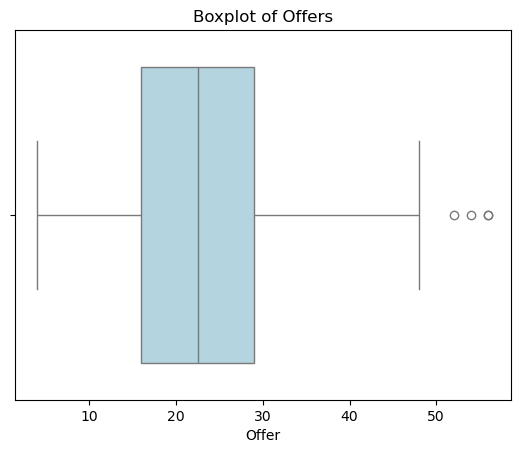

In [132]:
sns.boxplot(x=mobiles_data['Offer'], color='lightblue')
plt.title('Boxplot of Offers')
plt.show()

### **9.Rating Category Distribution**

C:\Users\gowth\AppData\Local\Temp\ipykernel_17256\17763187.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating_Category', data=mobiles_data, palette='YlOrBr')


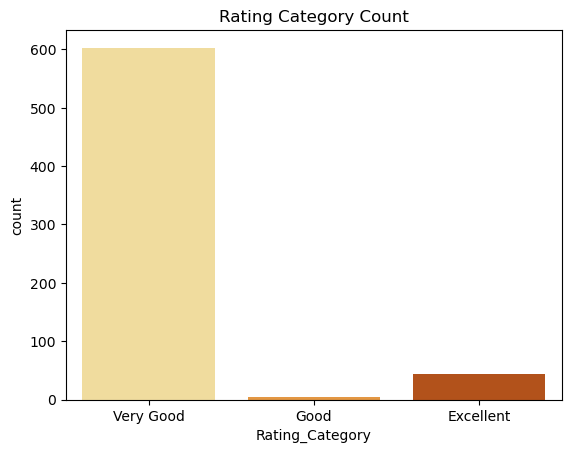

In [135]:
sns.countplot(x='Rating_Category', data=mobiles_data, palette='YlOrBr')
plt.title('Rating Category Count')
plt.show()

# Bivariate Analysis

### **1.Price vs Rating**

C:\Users\gowth\AppData\Local\Temp\ipykernel_17256\2782823509.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mobiles_data, x='Rating_Category', y='Price', palette='pastel')


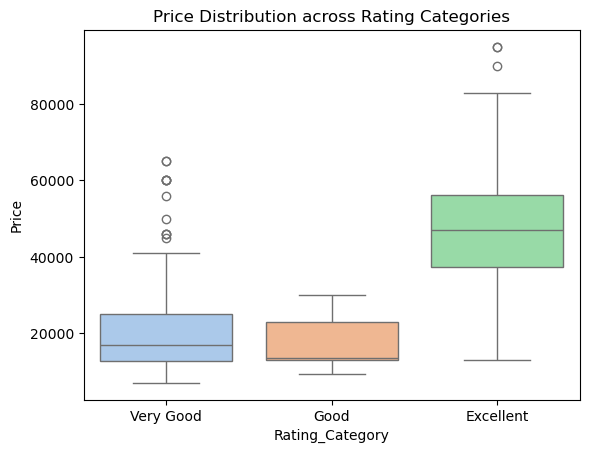

In [139]:
sns.boxplot(data=mobiles_data, x='Rating_Category', y='Price', palette='pastel')
plt.title('Price Distribution across Rating Categories')
plt.show()

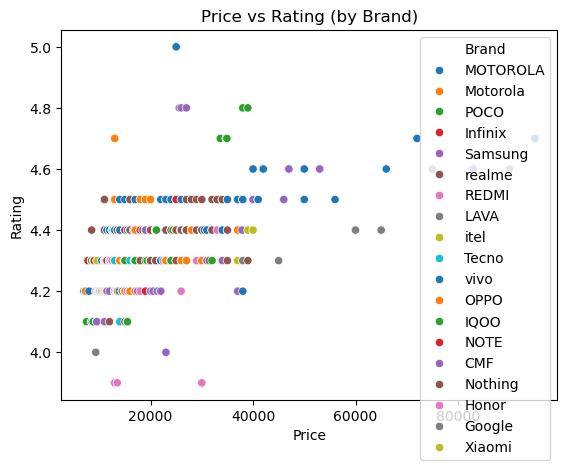

In [141]:
sns.scatterplot(data=mobiles_data, x='Price', y='Rating', hue='Brand', palette='tab10')
plt.title('Price vs Rating (by Brand)')
plt.show()

### **2.Price vs Ram**

C:\Users\gowth\AppData\Local\Temp\ipykernel_17256\1911573406.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mobiles_data, x='Ram', y='Price', palette='Set3')


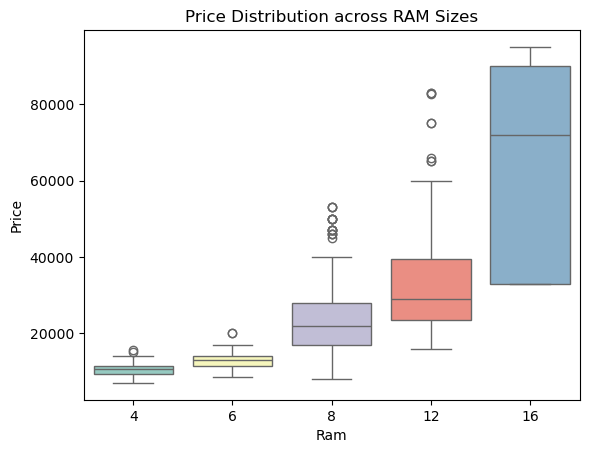

In [144]:
sns.boxplot(data=mobiles_data, x='Ram', y='Price', palette='Set3')
plt.title('Price Distribution across RAM Sizes')
plt.show()

### **3.Does storage size affect rating?**

C:\Users\gowth\AppData\Local\Temp\ipykernel_17256\3437130542.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Storage', y='Rating', data=mobiles_data, palette='Set2')


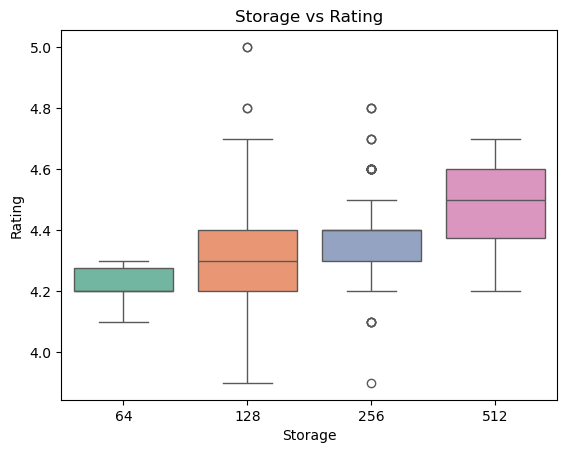

In [147]:
sns.boxplot(x='Storage', y='Rating', data=mobiles_data, palette='Set2')
plt.title('Storage vs Rating')
plt.show()

### **4.Brand vs Average Price**

C:\Users\gowth\AppData\Local\Temp\ipykernel_17256\2206888558.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette='viridis')


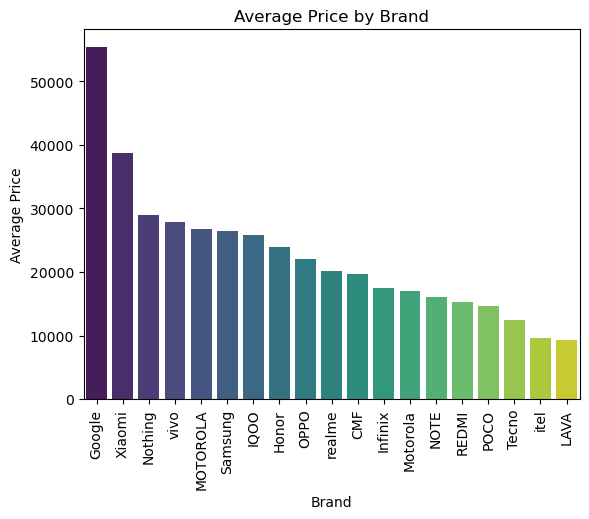

In [150]:
avg_price = mobiles_data.groupby('Brand')['Price'].mean().sort_values(ascending=False)

sns.barplot(x=avg_price.index, y=avg_price.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Price by Brand')
plt.ylabel('Average Price')
plt.xlabel('Brand')
plt.show()

### **5.Offer (%) vs Price**

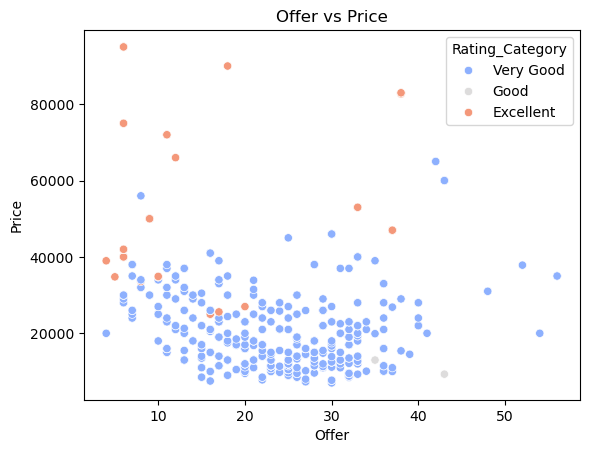

In [153]:
sns.scatterplot(data=mobiles_data, x='Offer', y='Price', hue='Rating_Category', palette='coolwarm')
plt.title('Offer vs Price')
plt.show()

### **6.Battery vs Price**

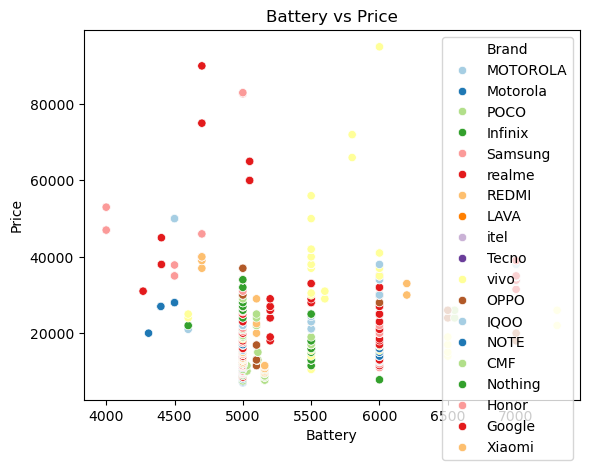

In [448]:
sns.scatterplot(data=mobiles_data, x='Battery', y='Price', hue='Brand', palette='Paired')
plt.title('Battery vs Price')
plt.show()

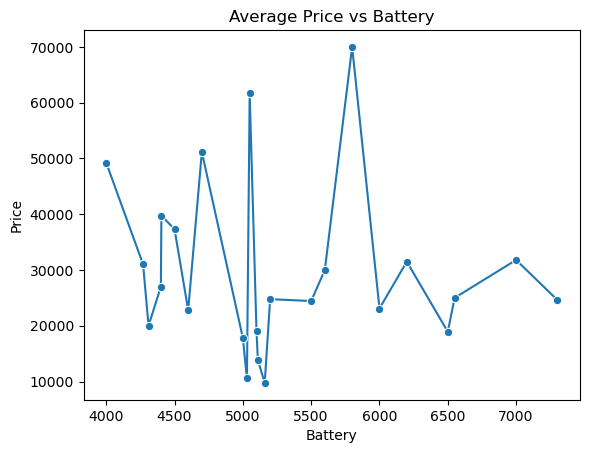

In [158]:
battery_price = mobiles_data.groupby('Battery')['Price'].mean().reset_index()
sns.lineplot(data=battery_price, x='Battery', y='Price', marker='o')
plt.title('Average Price vs Battery')
plt.show()

### **7.Price Range vs Rating Category**

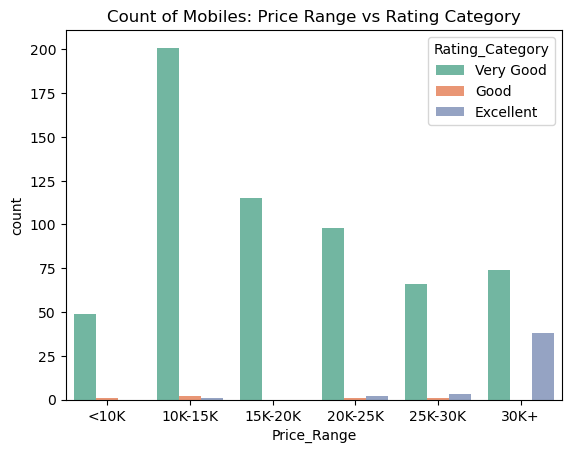

In [161]:
sns.countplot(data=mobiles_data, x='Price_Range', hue='Rating_Category', palette='Set2')
plt.title('Count of Mobiles: Price Range vs Rating Category')
plt.show()

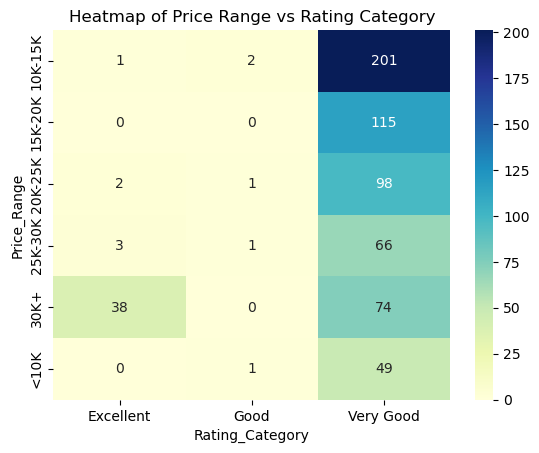

In [163]:
import pandas as pd
heat_data = pd.crosstab(mobiles_data['Price_Range'], mobiles_data['Rating_Category'])
sns.heatmap(heat_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Price Range vs Rating Category')
plt.show()

### **8.Brand vs Total Engagements**

C:\Users\gowth\AppData\Local\Temp\ipykernel_17256\3967460820.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_engagement.index, y=brand_engagement.values, palette='cubehelix')


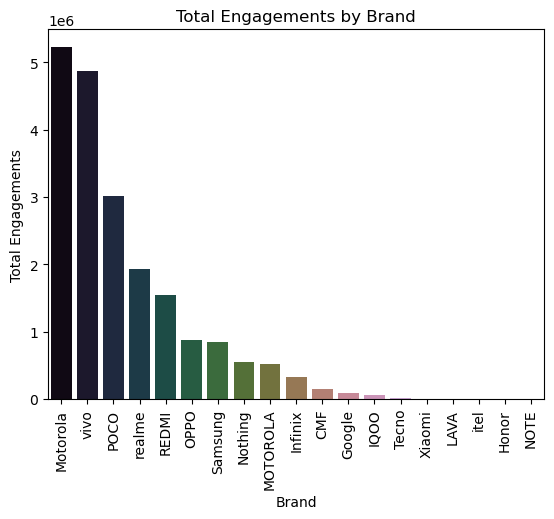

In [166]:
brand_engagement = mobiles_data.groupby('Brand')['Total_Engagements'].sum().sort_values(ascending=False)

sns.barplot(x=brand_engagement.index, y=brand_engagement.values, palette='cubehelix')
plt.xticks(rotation=90)
plt.title('Total Engagements by Brand')
plt.ylabel('Total Engagements')
plt.xlabel('Brand')
plt.show()

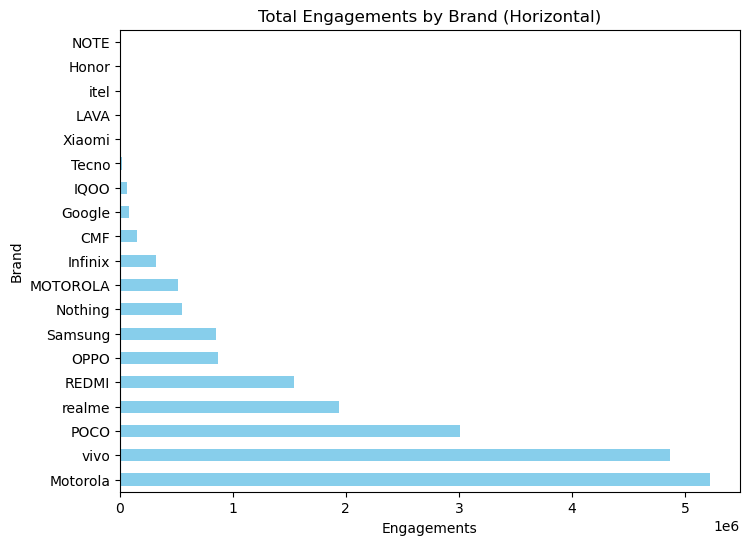

In [168]:
brand_engagement.plot(kind='barh', color='skyblue', figsize=(8,6))
plt.title('Total Engagements by Brand (Horizontal)')
plt.xlabel('Engagements')
plt.show()

### **9.Ram vs Average Rating**

C:\Users\gowth\AppData\Local\Temp\ipykernel_17256\296098367.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ram_rating.index.astype(str), y=ram_rating.values, palette='coolwarm')


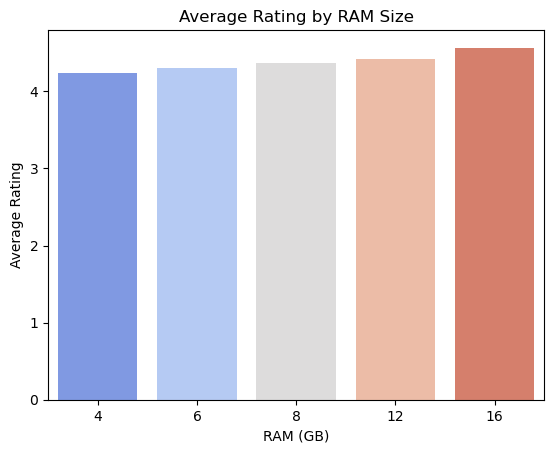

In [171]:
ram_rating = mobiles_data.groupby('Ram')['Rating'].mean().sort_index()
sns.barplot(x=ram_rating.index.astype(str), y=ram_rating.values, palette='coolwarm')
plt.title('Average Rating by RAM Size')
plt.xlabel('RAM (GB)')
plt.ylabel('Average Rating')
plt.show()

### **10.Battery vs Rating**

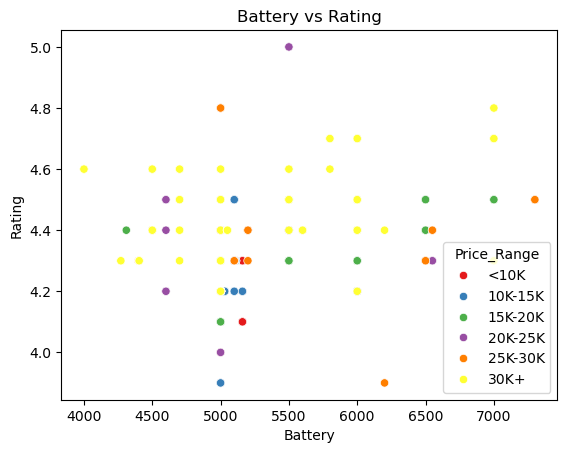

In [174]:
sns.scatterplot(data=mobiles_data, x='Battery', y='Rating', hue='Price_Range', palette='Set1')
plt.title('Battery vs Rating')
plt.show()

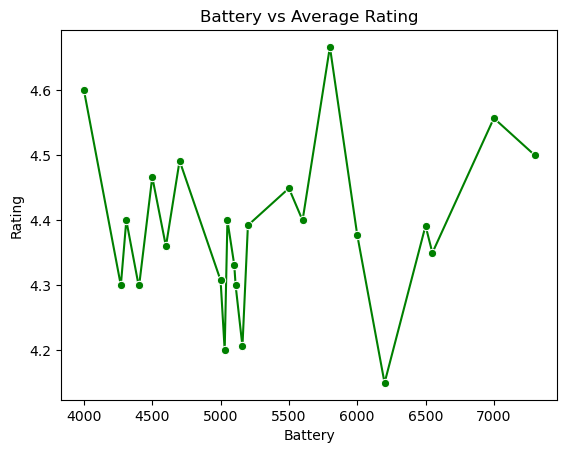

In [176]:
battery_rating = mobiles_data.groupby('Battery')['Rating'].mean().reset_index()
sns.lineplot(data=battery_rating, x='Battery', y='Rating', marker='o', color='green')
plt.title('Battery vs Average Rating')
plt.show()